In [96]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, precision_score, precision_recall_curve, confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [97]:
df = pd.read_csv('../data/train/train.csv')

<Axes: >

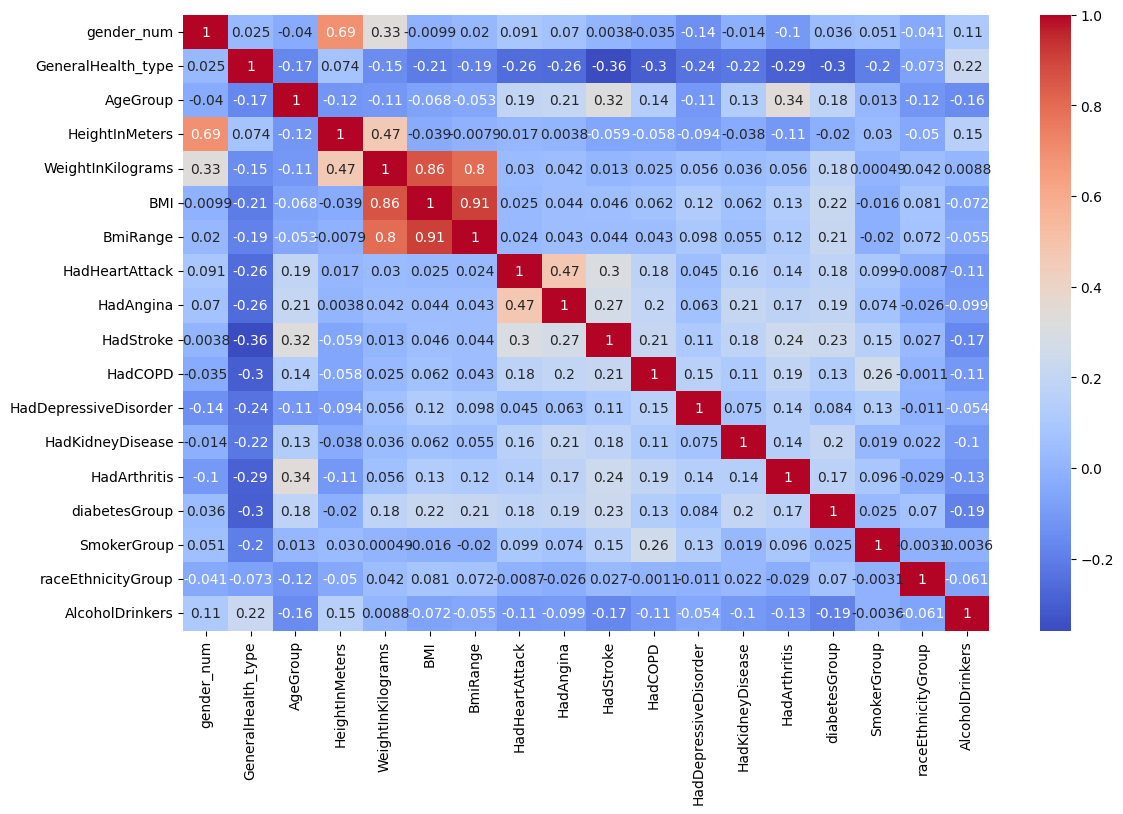

In [98]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [99]:
df

,Sex,gender_num,GeneralHealth,GeneralHealth_type,AgeCategory,AgeGroup,HeightInMeters,WeightInKilograms,BMI,BmiRange,...,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,diabetesGroup,SmokerStatus,SmokerGroup,RaceEthnicityCategory,raceEthnicityGroup,AlcoholDrinkers
0,Female,0,Good,3,Age 65 to 69,3,1.73,67.589996,22.660000,1,...,1,1,0,No,0,Never smoked,0,"White only, Non-Hispanic",1,0
1,Female,0,Good,3,Age 65 to 69,3,1.60,73.480003,28.700001,2,...,0,0,0,No,0,Never smoked,0,"White only, Non-Hispanic",1,1
2,Female,0,Good,3,Age 55 to 59,2,1.60,70.760002,27.629999,2,...,0,0,0,No,0,Former smoker,1,"White only, Non-Hispanic",1,1
3,Female,0,Fair,2,Age 80 or older,4,1.68,82.550003,29.379999,2,...,1,0,1,Yes,3,Never smoked,0,"Black only, Non-Hispanic",4,0
4,Male,1,Poor,1,Age 40 to 44,2,1.70,56.700001,19.580000,1,...,1,0,1,No,0,Current smoker - now smokes some days,2,"White only, Non-Hispanic",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20689,Female,0,Very good,4,Age 80 or older,4,1.52,63.500000,27.340000,2,...,0,0,1,No,0,Never smoked,0,"White only, Non-Hispanic",1,0
20690,Male,1,Good,3,Age 70 to 74,3,1.83,99.790001,29.840000,2,...,0,1,1,"No, pre-diabetes or borderline diabetes",2,Current smoker - now smokes every day,3,"Multiracial, Non-Hispanic",3,0
20691,Male,1,Fair,2,Age 75 to 79,3,1.70,58.970001,20.360001,1,...,0,0,0,No,0,Current smoker - now smokes every day,3,"White only, Non-Hispanic",1,0
20692,Female,0,Good,3,Age 40 to 44,2,1.65,88.449997,32.450001,3,...,1,0,0,No,0,Current smoker - now smokes some days,2,"Multiracial, Non-Hispanic",3,0


### Train Test Split

In [100]:
X = df[['AgeGroup', 'HadHeartAttack', 'diabetesGroup','SmokerGroup', 'AlcoholDrinkers', 'HadArthritis','HadKidneyDisease', 'HadDepressiveDisorder']]
Y = df['HadStroke']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### Entrenar y predecir

# Modelo 1: DecisionTreeClassifier

### Entrenar y predecir

In [101]:
dct_model = DecisionTreeClassifier(max_depth=6)
dct_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [102]:
y_pred = dct_model.predict(X_test)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
print('confusion matrix'), confusion_matrix(y_test,y_pred)

accuracy_score 0.702343561246678
precision_score 0.6210986267166042
recall_score 0.6141975308641975
confusion matrix


(None,
 array([[1912,  607],
        [ 625,  995]]))

# Modelo 2: LogisticRegression

### Entrenar y predecir

In [103]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [104]:
y_pred = lr_model.predict(X_test)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
print('confusion matrix'), confusion_matrix(y_test,y_pred)

accuracy_score 0.6994443102198599
precision_score 0.6446153846153846
recall_score 0.5172839506172839
confusion matrix


(None,
 array([[2057,  462],
        [ 782,  838]]))

In [105]:
params = {"C" : np.arange(0.1,10,0.1)}

lr_gs = GridSearchCV(estimator=lr_model, param_grid=params, cv=5, scoring='recall')
lr_gs.fit(X_train, y_train)

print(lr_gs.best_estimator_)
print(lr_gs.best_score_)
print(lr_gs.best_params_)

LogisticRegression(C=np.float64(0.2), max_iter=1000)
0.5259194402275986
{'C': np.float64(0.2)}


# Guardado Modelo

In [106]:
# Guardar el modelo
import pickle

with open('../models/finished_model.pkl', "wb") as archivo_salida:
    pickle.dump(dct_model, archivo_salida)

In [107]:
# Cargar el modelo desde el archivo
with open('../models/finished_model.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

In [108]:
# Usar el modelo cargado para hacer predicciones
predicciones = modelo_cargado.predict(X_test) 

print("Predicciones:", predicciones)

Predicciones: [0 1 0 ... 1 0 1]


In [109]:
type(modelo_cargado)

sklearn.tree._classes.DecisionTreeClassifier

In [110]:
X.columns

Index(['AgeGroup', 'HadHeartAttack', 'diabetesGroup', 'SmokerGroup',
       'AlcoholDrinkers', 'HadArthritis', 'HadKidneyDisease',
       'HadDepressiveDisorder'],
      dtype='object')

In [111]:
X['SmokerGroup'].unique()

array([0, 1, 2, 3])

In [112]:
modelo_cargado.predict([[1, 0, 0, 0, 0]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but DecisionTreeClassifier is expecting 8 features as input.

In [ ]:
X_test

,AgeGroup,HadHeartAttack,diabetesGroup,SmokerGroup,AlcoholDrinkers
14712,2,0,0,0,0
15806,3,1,0,3,1
8657,2,0,0,0,1
12956,2,0,3,3,1
3210,2,0,3,0,1
...,...,...,...,...,...
17668,4,0,3,3,0
729,3,0,3,0,0
16604,3,0,3,0,0
10300,2,0,0,0,1


In [113]:
df

,Sex,gender_num,GeneralHealth,GeneralHealth_type,AgeCategory,AgeGroup,HeightInMeters,WeightInKilograms,BMI,BmiRange,...,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,diabetesGroup,SmokerStatus,SmokerGroup,RaceEthnicityCategory,raceEthnicityGroup,AlcoholDrinkers
0,Female,0,Good,3,Age 65 to 69,3,1.73,67.589996,22.660000,1,...,1,1,0,No,0,Never smoked,0,"White only, Non-Hispanic",1,0
1,Female,0,Good,3,Age 65 to 69,3,1.60,73.480003,28.700001,2,...,0,0,0,No,0,Never smoked,0,"White only, Non-Hispanic",1,1
2,Female,0,Good,3,Age 55 to 59,2,1.60,70.760002,27.629999,2,...,0,0,0,No,0,Former smoker,1,"White only, Non-Hispanic",1,1
3,Female,0,Fair,2,Age 80 or older,4,1.68,82.550003,29.379999,2,...,1,0,1,Yes,3,Never smoked,0,"Black only, Non-Hispanic",4,0
4,Male,1,Poor,1,Age 40 to 44,2,1.70,56.700001,19.580000,1,...,1,0,1,No,0,Current smoker - now smokes some days,2,"White only, Non-Hispanic",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20689,Female,0,Very good,4,Age 80 or older,4,1.52,63.500000,27.340000,2,...,0,0,1,No,0,Never smoked,0,"White only, Non-Hispanic",1,0
20690,Male,1,Good,3,Age 70 to 74,3,1.83,99.790001,29.840000,2,...,0,1,1,"No, pre-diabetes or borderline diabetes",2,Current smoker - now smokes every day,3,"Multiracial, Non-Hispanic",3,0
20691,Male,1,Fair,2,Age 75 to 79,3,1.70,58.970001,20.360001,1,...,0,0,0,No,0,Current smoker - now smokes every day,3,"White only, Non-Hispanic",1,0
20692,Female,0,Good,3,Age 40 to 44,2,1.65,88.449997,32.450001,3,...,1,0,0,No,0,Current smoker - now smokes some days,2,"Multiracial, Non-Hispanic",3,0
